<a href="https://colab.research.google.com/github/gaaythri/Gayathri/blob/master/FingerVein_Biometric_Recognition_Main_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output
clear_output()
from IPython.display import display, HTML
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import Bunch
from sklearn import svm, metrics, datasets
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize
from pathlib import Path
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from math import *
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint


In [ ]:
init_notebook_mode(connected=True)
RANDOM_SEED = 123

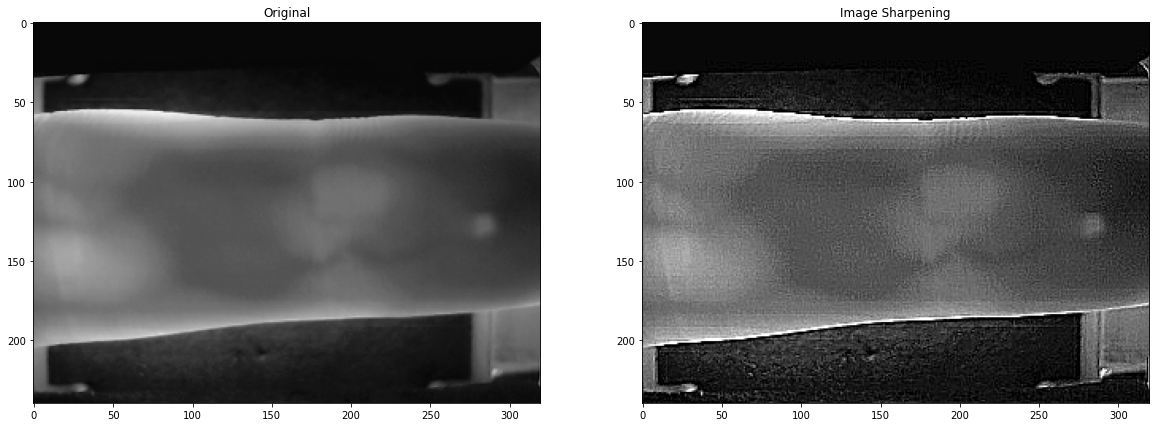

In [ ]:
IMG_PATH = '/content/drive/MyDrive/Dataset/'
image = cv2.imread('/content/drive/MyDrive/Dataset/001/index_1.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)


kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(image, -1, kernel_sharpening)


plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)

plt.show()

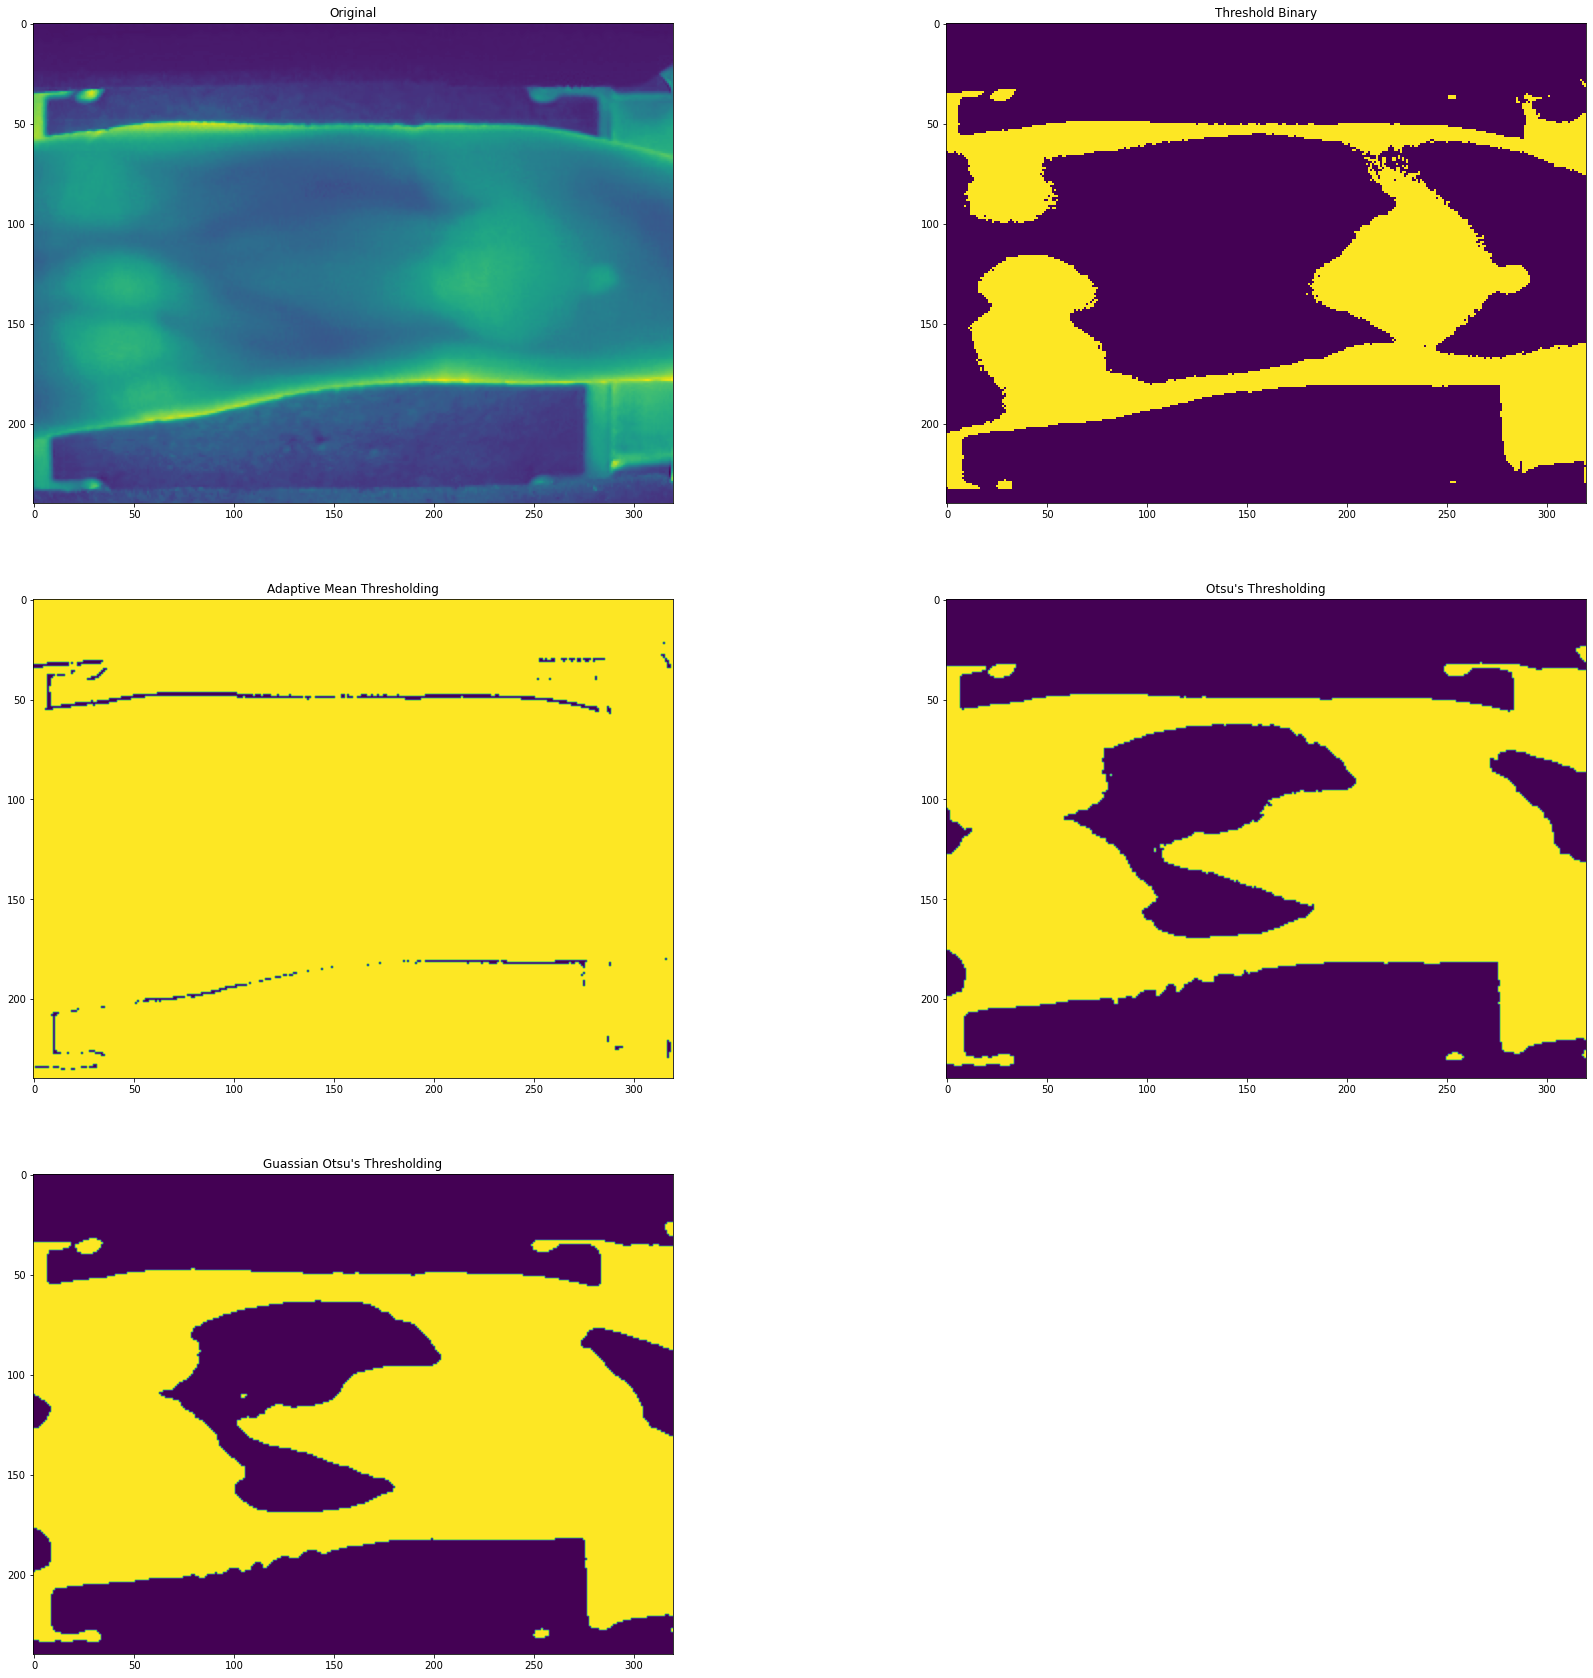

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Dataset/002/index_2.bmp', 0)

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.subplot(3, 2, 2)
plt.title("Threshold Binary")
plt.imshow(thresh1)


image = cv2.GaussianBlur(image, (3, 3), 0)

thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 

plt.subplot(3, 2, 3)
plt.title("Adaptive Mean Thresholding")
plt.imshow(thresh)


_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(3, 2, 4)
plt.title("Otsu's Thresholding")
plt.imshow(th2)


plt.subplot(3, 2, 5)
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()


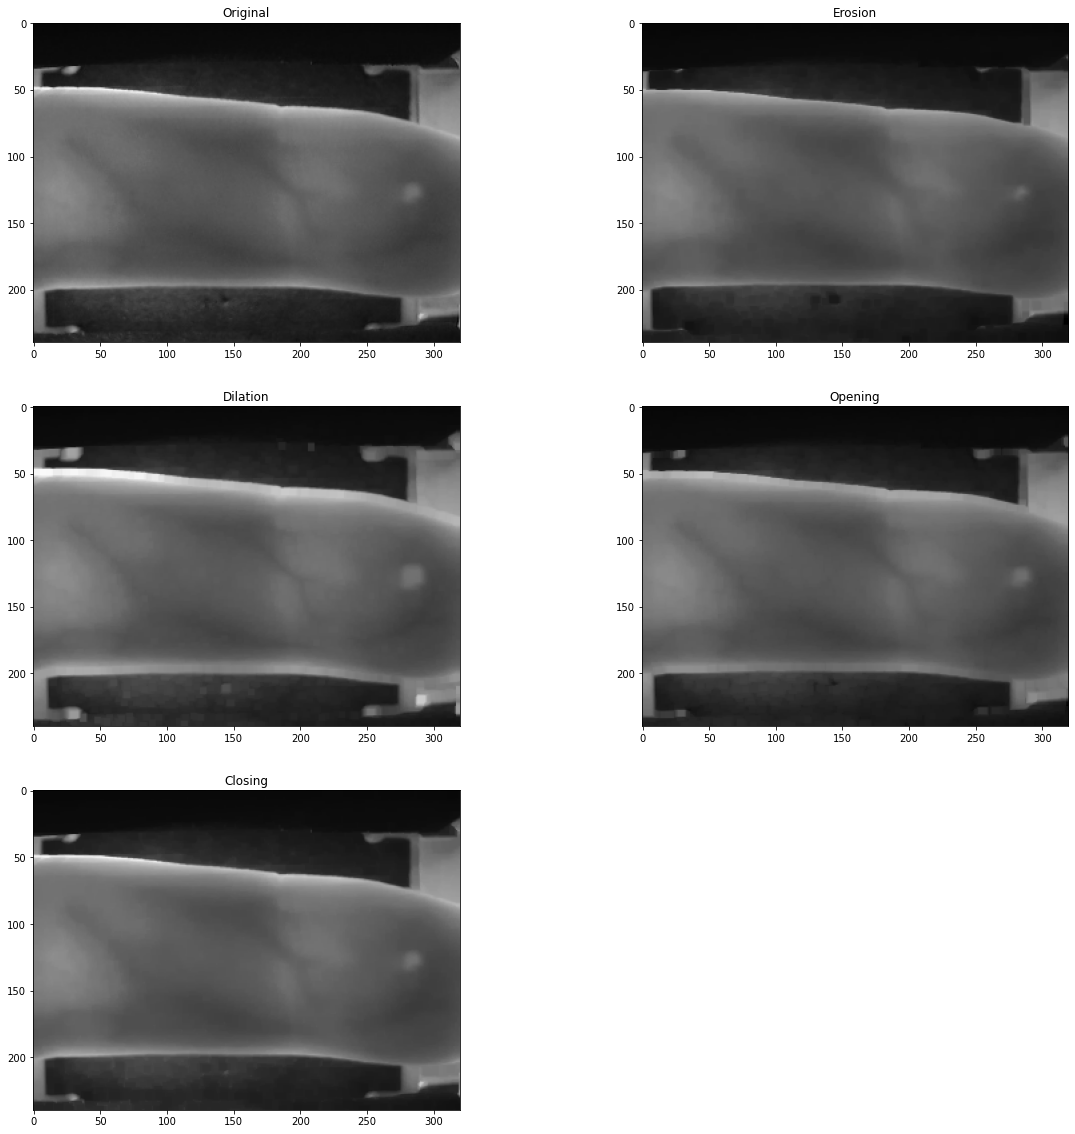

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Dataset/003/index_3.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)


kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(image, kernel, iterations = 1)

plt.subplot(3, 2, 2)
plt.title("Erosion")
plt.imshow(erosion)

# 
dilation = cv2.dilate(image, kernel, iterations = 1)
plt.subplot(3, 2, 3)
plt.title("Dilation")
plt.imshow(dilation)


opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.subplot(3, 2, 4)
plt.title("Opening")
plt.imshow(opening)


closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.subplot(3, 2, 5)
plt.title("Closing")
plt.imshow(closing)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


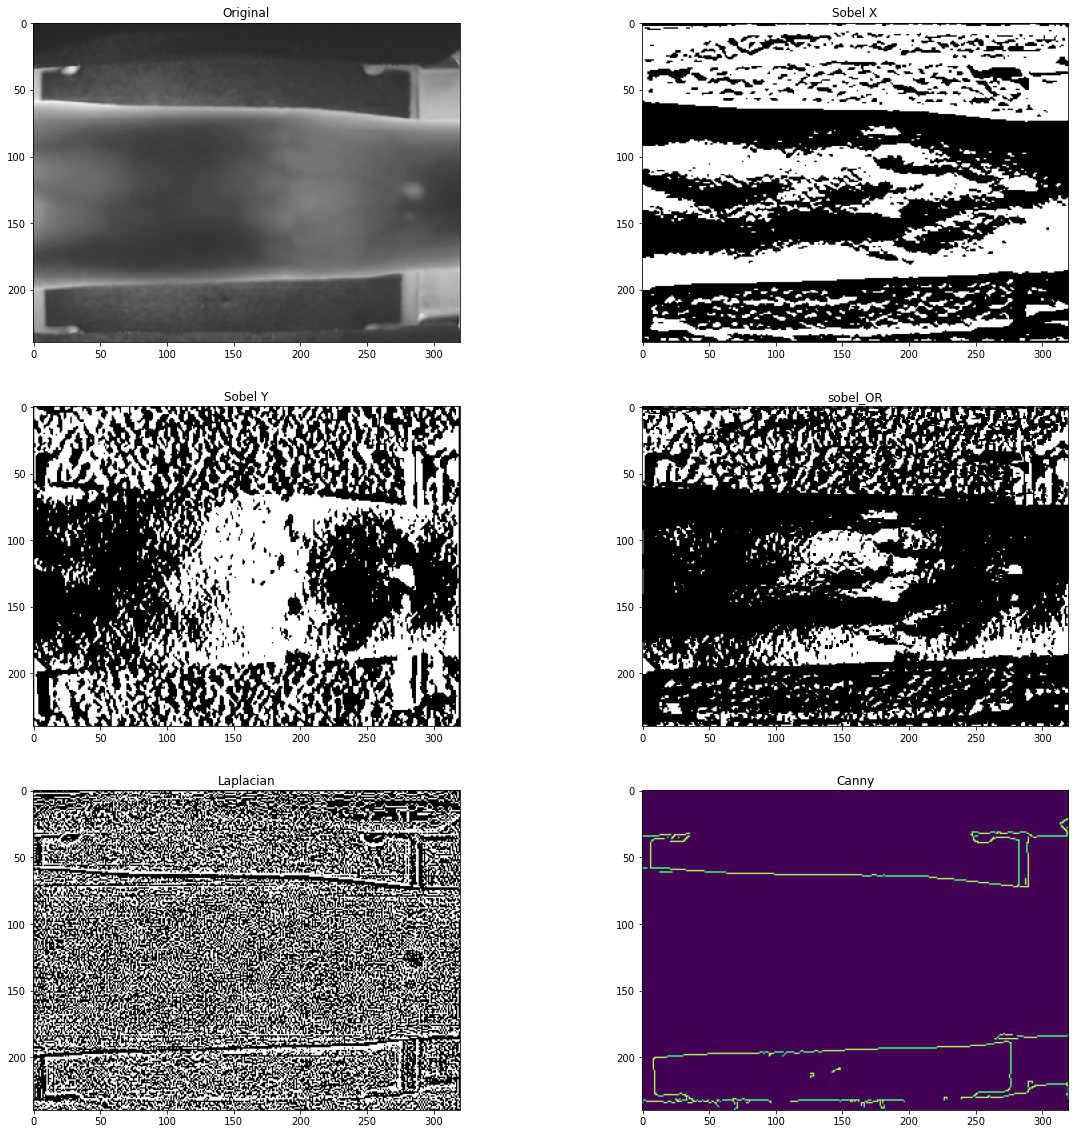

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Dataset/004/middle_1.bmp', 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width,_ = image.shape

sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x)


plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)

plt.subplot(3, 2, 4)
plt.title("sobel_OR")
plt.imshow(sobel_OR)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)

canny = cv2.Canny(image, 50, 120)

plt.subplot(3, 2, 6)
plt.title("Canny")
plt.imshow(canny)

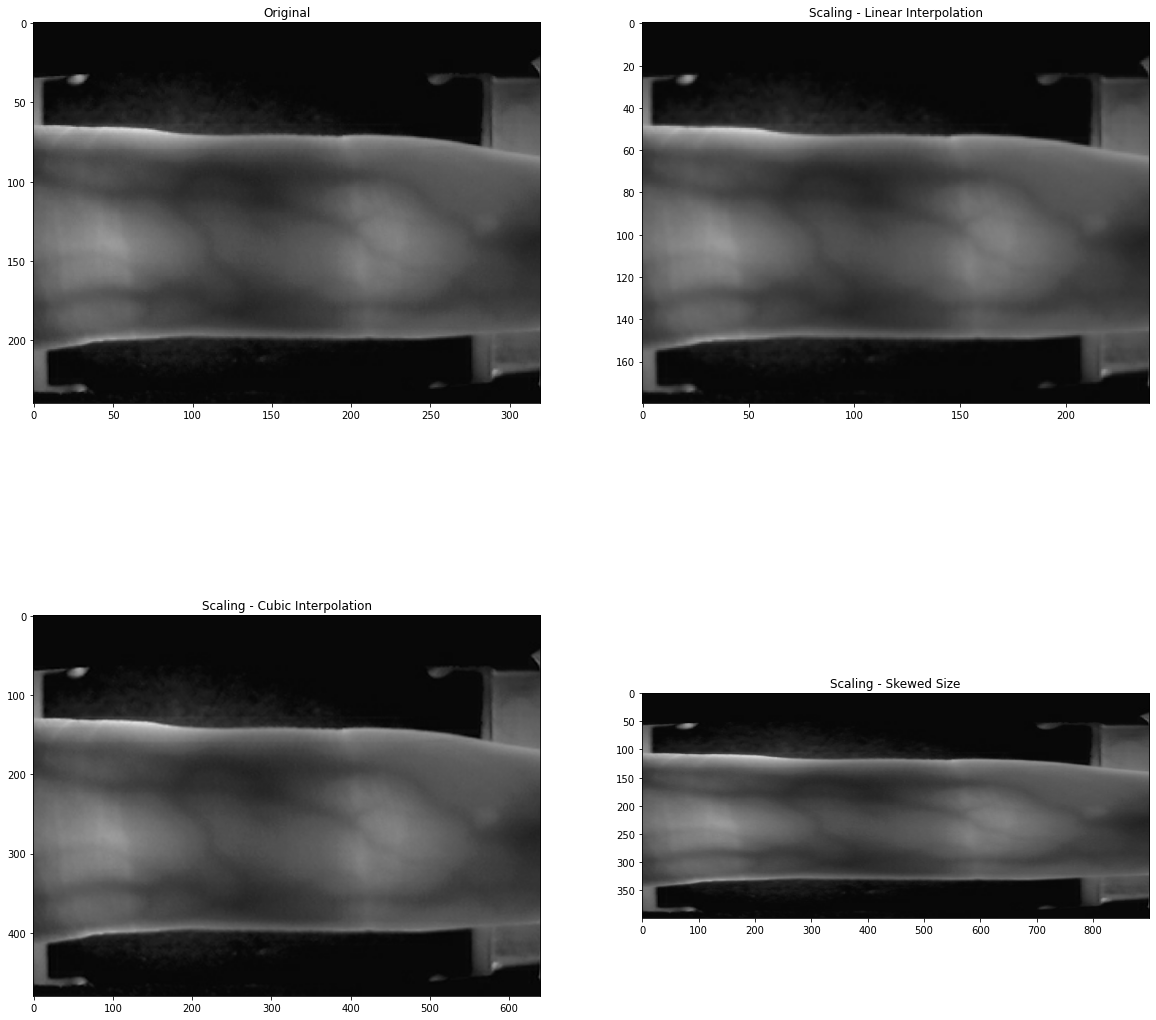

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Dataset/005/index_6.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)

plt.subplot(2, 2, 2)
plt.title("Scaling - Linear Interpolation")
plt.imshow(image_scaled)

img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

plt.subplot(2, 2, 3)
plt.title("Scaling - Cubic Interpolation")
plt.imshow(img_scaled)

img_scaled = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)

plt.subplot(2, 2, 4)
plt.title("Scaling - Skewed Size")
plt.imshow(img_scaled)

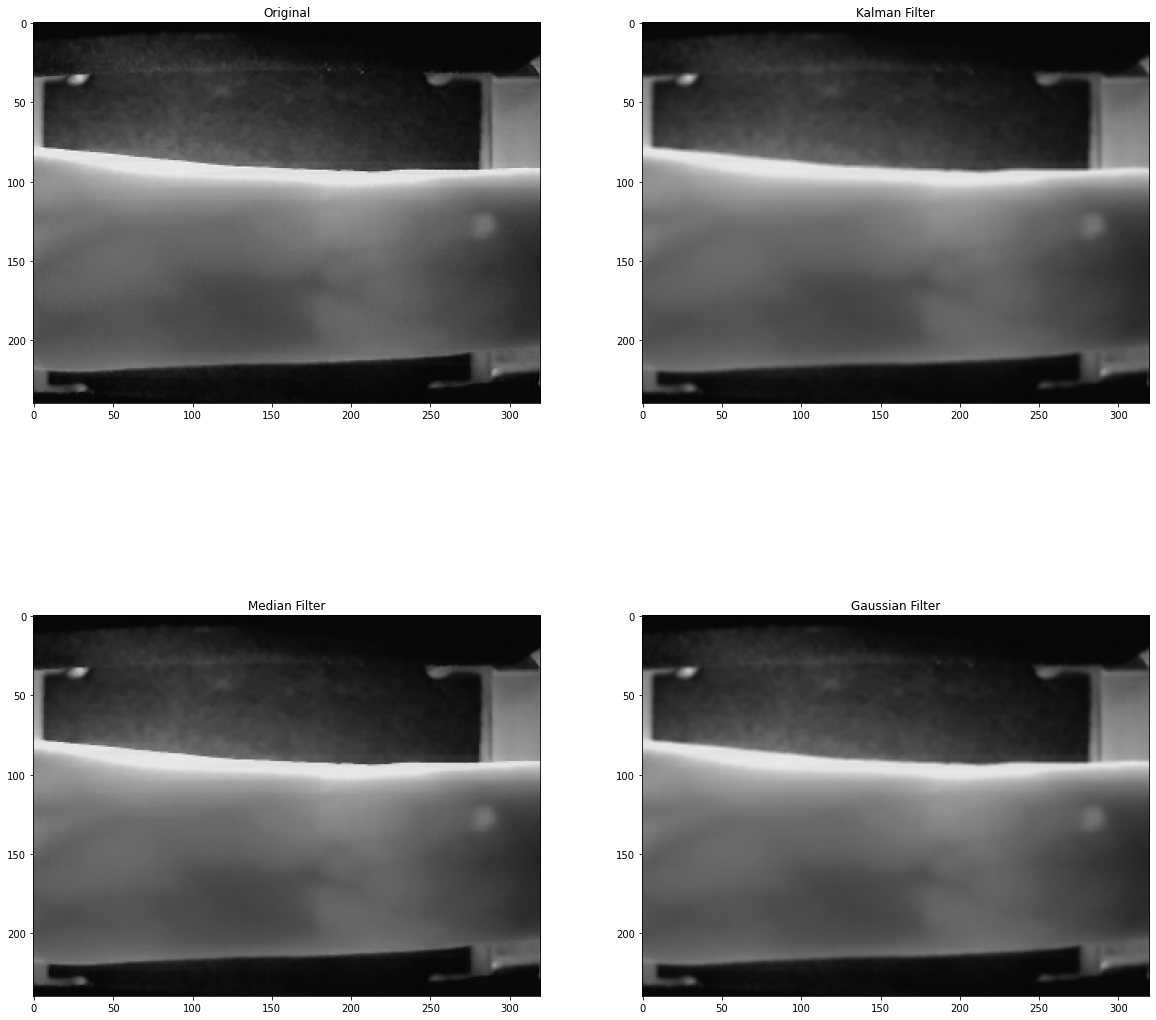

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Dataset/001/ring_6.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

kalman_3x3 = np.ones((3, 3), np.float32) / 9

blurred = cv2.filter2D(image, -1, kalman_3x3)

plt.subplot(2, 2, 2)
plt.title("Kalman Filter")
plt.imshow(blurred)

kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.medianBlur(image, 3)

plt.subplot(2, 2, 3)
plt.title("Median Filter")
plt.imshow(blurred2)

blurred3 = cv2.GaussianBlur(image, (3,3),1)

plt.subplot(2, 2, 4)
plt.title("Gaussian Filter")
plt.imshow(blurred3)

Number of Contours found = 5


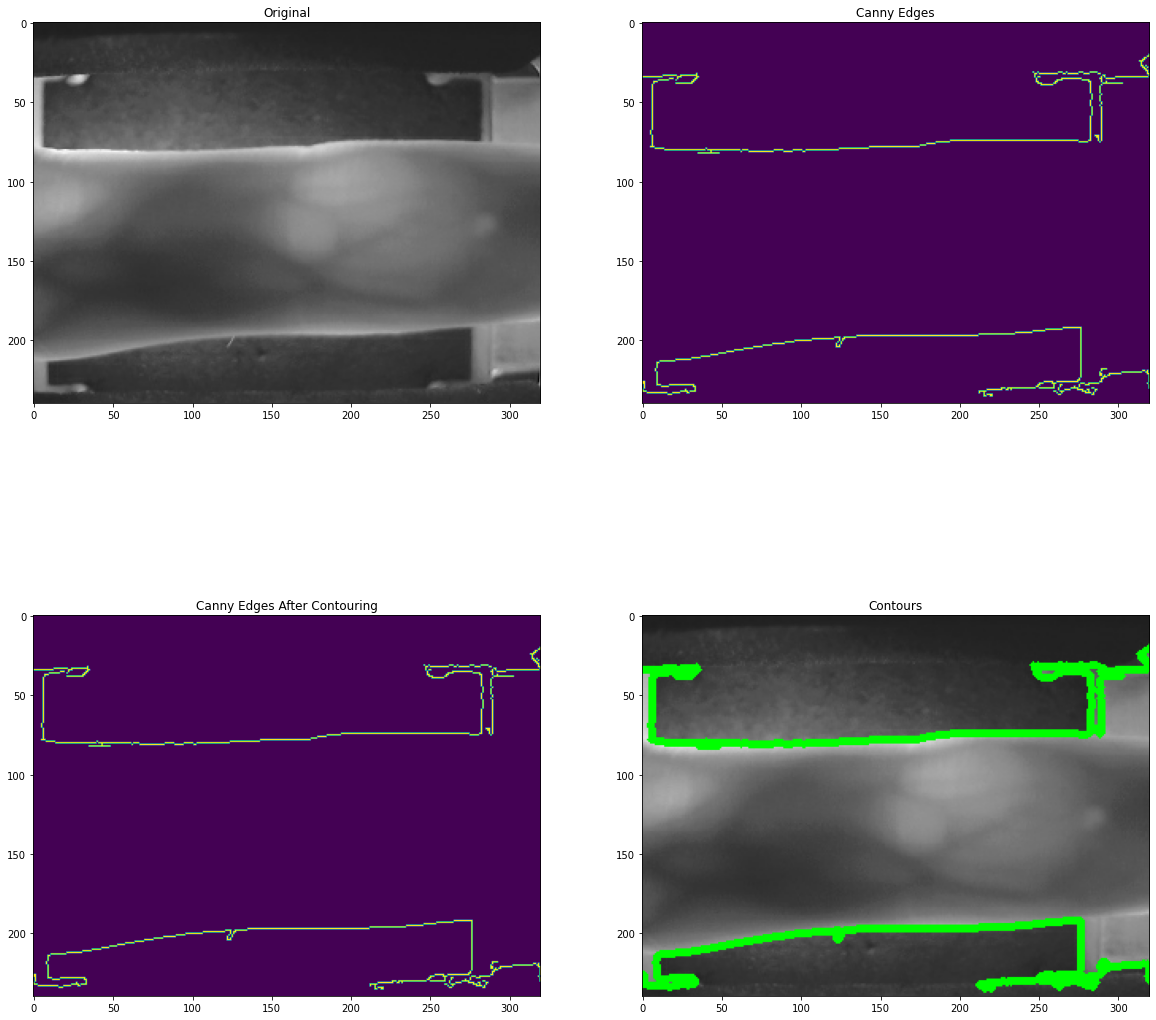

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Dataset/002/ring_4.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)



gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


edged = cv2.Canny(gray, 30, 200)

plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)



contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.subplot(2, 2, 3)
plt.title("Canny Edges After Contouring")
plt.imshow(edged)

print("Number of Contours found = " + str(len(contours)))


cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



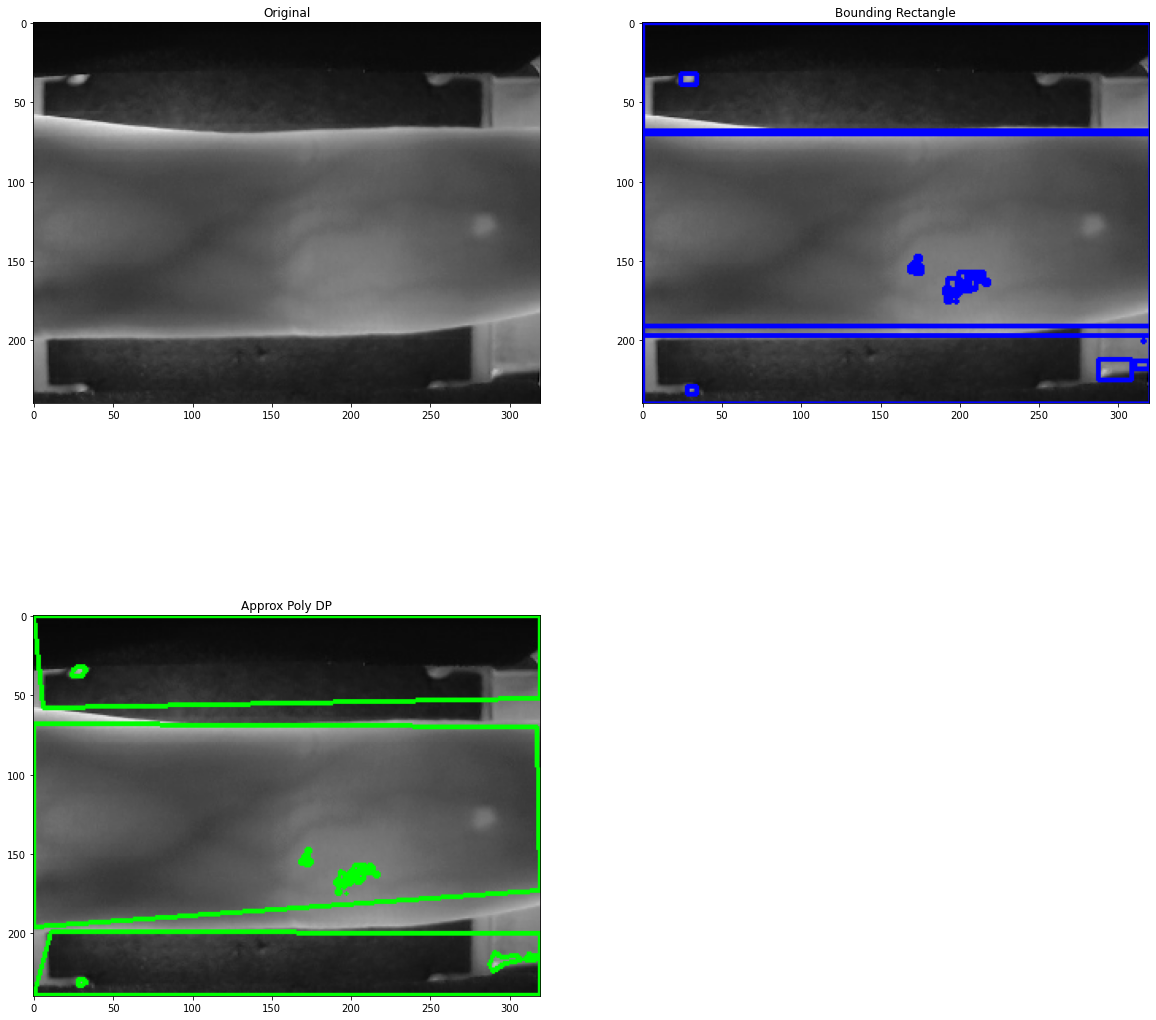

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Dataset/003/ring_4.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

orig_image = image.copy()



gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)


contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)    
    plt.subplot(2, 2, 2)
    plt.title("Bounding Rectangle")
    plt.imshow(orig_image)

    

for c in contours:
    
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    
    plt.subplot(2, 2, 3)
    plt.title("Approx Poly DP")
    plt.imshow(image)

plt.show()
    

In [ ]:

for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
        IMG_NUM = len(os.listdir(IMG_PATH + CLASS))
        for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH + CLASS)):
            img = IMG_PATH + CLASS + '/' + FILE_NAME
            if n < 5:
                shutil.copy(img, '/content/drive/MyDrive/Dataset1/Test/' + CLASS.upper() + '/' + FILE_NAME)
            elif n < 0.8*IMG_NUM:
                shutil.copy(img, '/content/drive/MyDrive/Dataset1/Train/'+ CLASS.upper() + '/' + FILE_NAME)
            else:
                shutil.copy(img, '/content/drive/MyDrive/Dataset1/Val/'+ CLASS.upper() + '/' + FILE_NAME)

In [ ]:
def load_data(dir_path, img_size=(100,100)):
    
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels





In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print (plt.show())

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Dataset1/Train/'
TEST_DIR = '/content/drive/MyDrive/Dataset1/Test/'
VAL_DIR = '/content/drive/MyDrive/Dataset1/Val/'
IMG_SIZE = (320,240)

In [ ]:
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)

100%|██████████| 5/5 [00:08<00:00,  1.74s/it]

114 images loaded from /content/drive/MyDrive/Dataset1/Train/ directory.


In [ ]:
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

54 images loaded from /content/drive/MyDrive/Dataset1/Test/ directory.


In [ ]:
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

50 images loaded from /content/drive/MyDrive/Dataset1/Val/ directory.


In [ ]:
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))
trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
plt.show(fig)

In [ ]:
def plot_samples(X, y, labels_dict, n=50):
    
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('FingerVein: {}'.format(labels_dict[index]))
        plt.show()

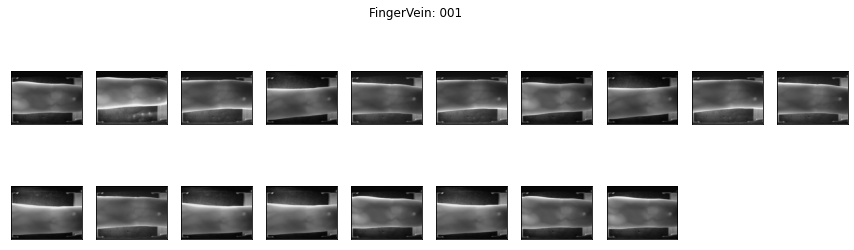

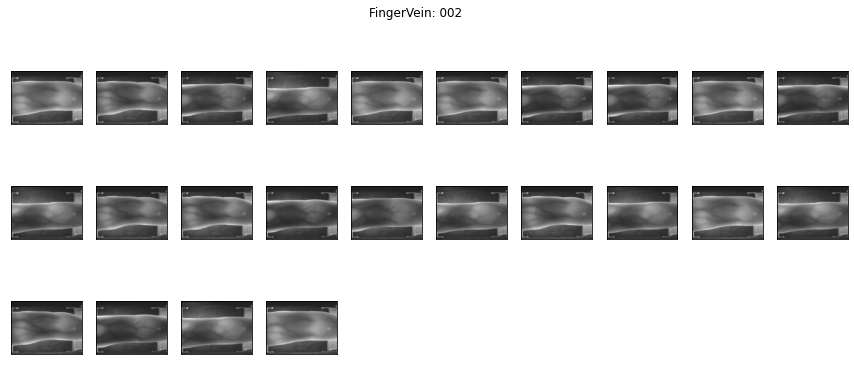

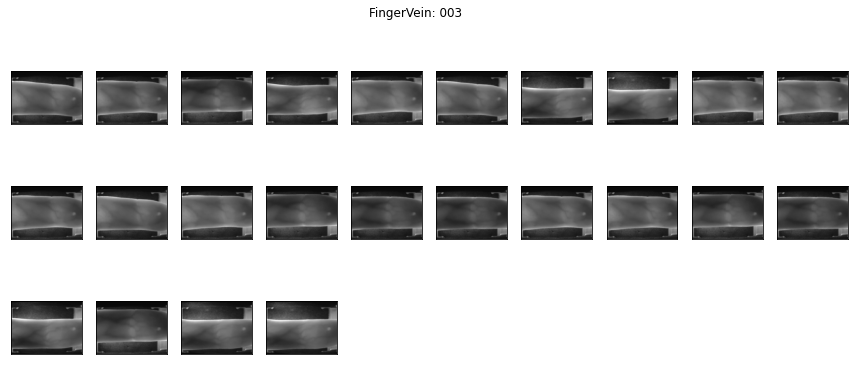

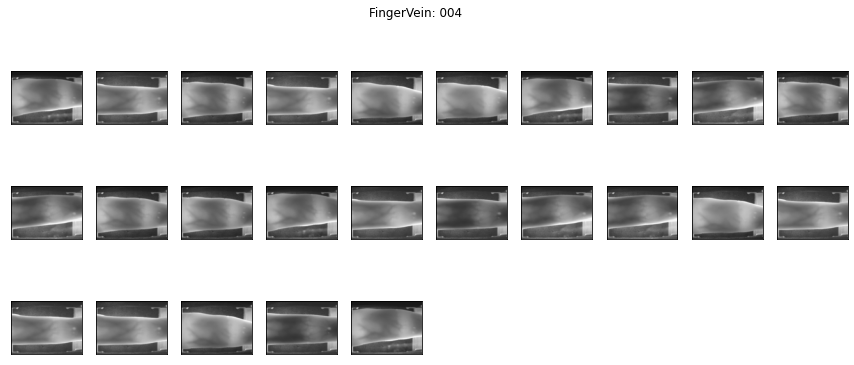

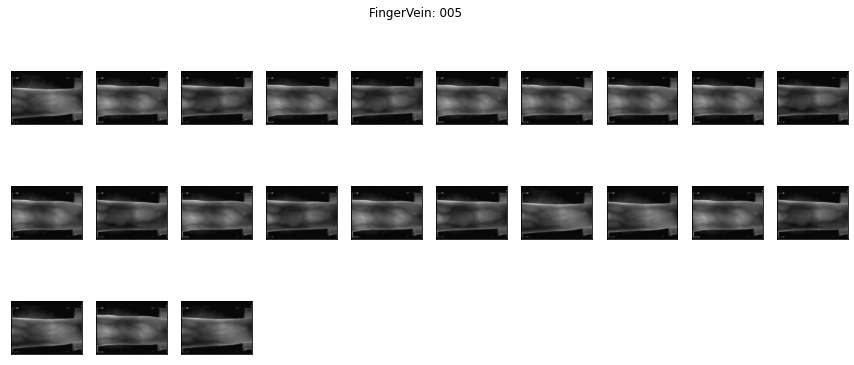

In [ ]:
plot_samples(X_train, y_train, labels, 30)

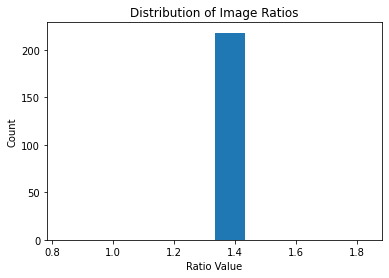

In [ ]:
RATIO_LIST = []
for set in (X_train, X_test, X_val):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

In [ ]:
def crop_imgs(set_name, add_pixels_value=0):
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Dataset/001/index_3.bmp')
img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()


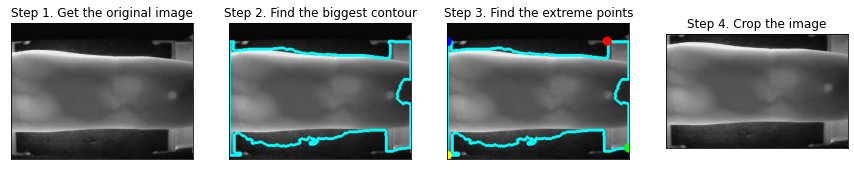

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('/content/drive/MyDrive/Dataset/001/index_3.bmp')
gray_img = rgb2gray(img)

In [ ]:
#pyr_img = multiPyrDown(gray_img, debug=True)

In [ ]:
X_train_crop = crop_imgs(set_name=X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
X_val_crop = crop_imgs(set_name=X_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
X_test_crop = crop_imgs(set_name=X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



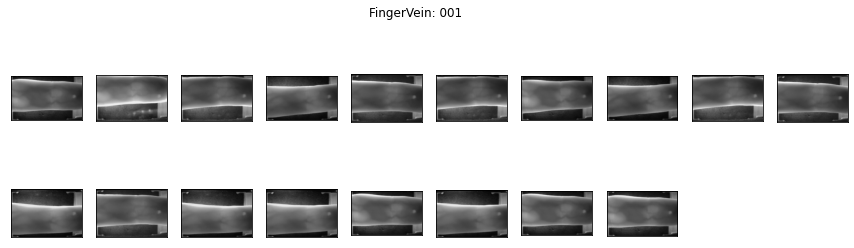

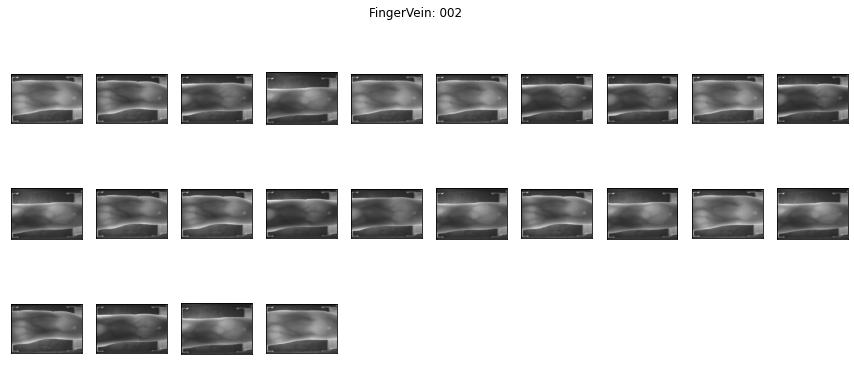

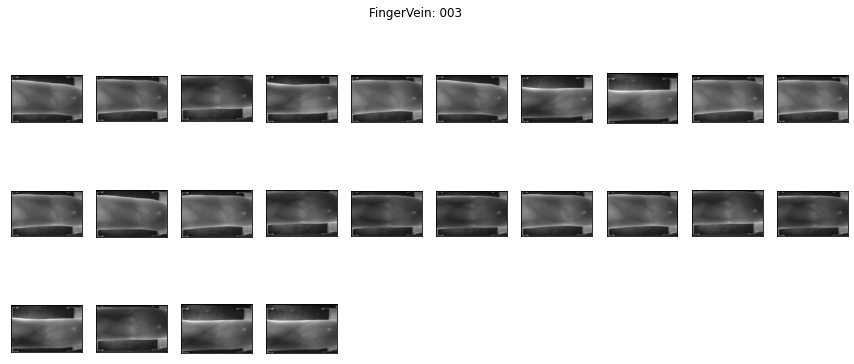

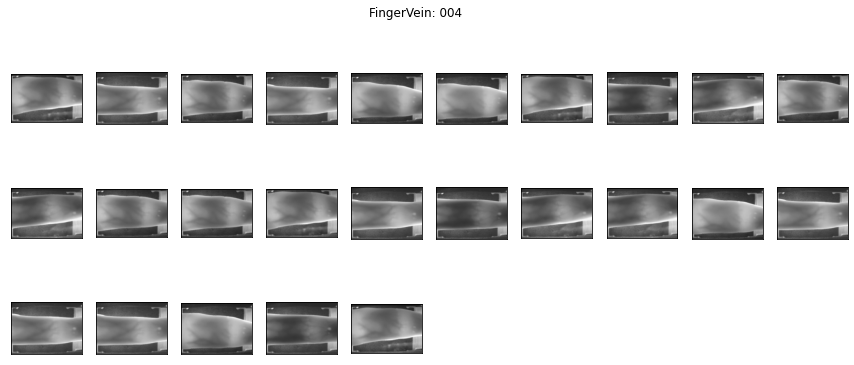

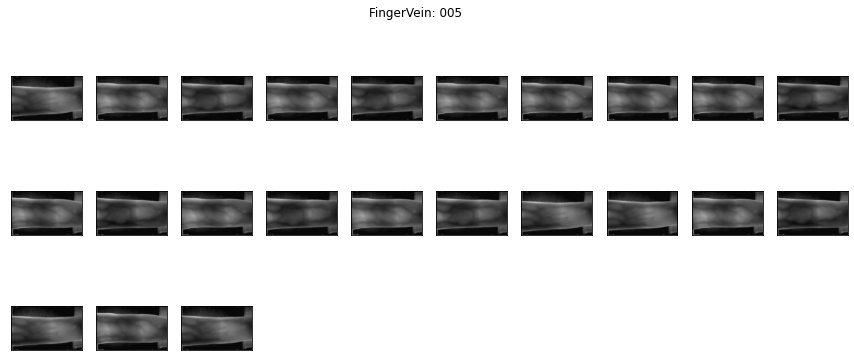

In [ ]:
plot_samples(X_train_crop, y_train, labels, 30)

In [ ]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [ ]:

save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_val_crop, y_val, folder_name='VAL_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

In [ ]:
def preprocess_imgs(set_name, img_size):
    
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [ ]:
X_train_prep = preprocess_imgs(set_name=X_train_crop, img_size=IMG_SIZE)
X_test_prep = preprocess_imgs(set_name=X_test_crop, img_size=IMG_SIZE)
X_val_prep = preprocess_imgs(set_name=X_val_crop, img_size=IMG_SIZE)

In [ ]:
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
os.mkdir('preview')
x = X_train_crop[0]  
x = x.reshape((1,) + x.shape) 

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break 

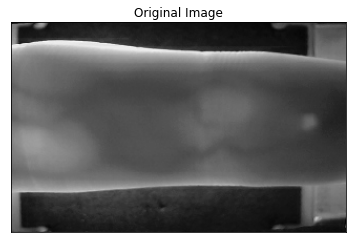

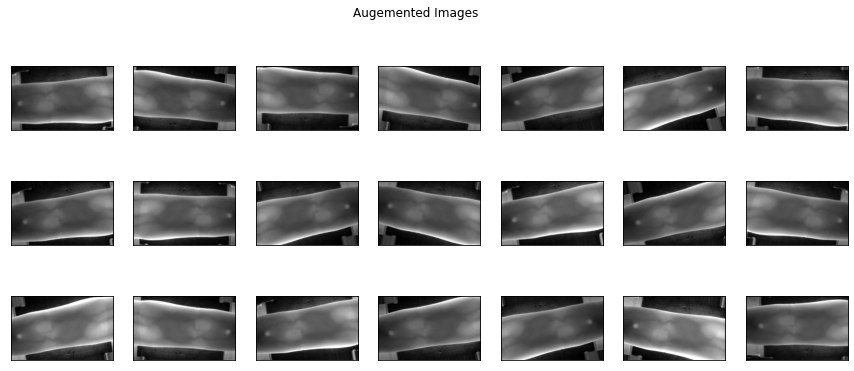

In [ ]:
plt.imshow(X_train_crop[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

In [ ]:
train_path = '/content/drive/MyDrive/Dataset1/Train/'
val_path = '/content/drive/MyDrive/Dataset1/Val/'
test_path = '/content/drive/MyDrive/Dataset1/Test/'

In [ ]:
IMAGE_SIZE = [320, 240]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 5 # We are aware of it.

In [ ]:
import os
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

In [ ]:
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['002', '003', '005', '004', '001'] 
 and the length is : 5


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (320, 240),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 114 images belonging to 5 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (320, 240),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 54 images belonging to 5 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
val_set = val_datagen.flow_from_directory(
    directory = val_path,
    target_size = (320, 240),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle=False
)

Found 50 images belonging to 6 classes.


In [ ]:
val_set.reset()
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 320, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 320, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 160, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 160, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 160, 120, 128)     147584    
                                                              

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("vgg.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/5
4/4 [==============================] - 136s 37s/step - loss: 0.6574 - accuracy: 0.8246 - val_loss: 0.5058 - val_accuracy: 0.9259
Epoch 2/5
4/4 [==============================] - 131s 35s/step - loss: 0.6280 - accuracy: 0.8070 - val_loss: 0.2944 - val_accuracy: 0.9259
Epoch 3/5
4/4 [==============================] - 130s 35s/step - loss: 0.4474 - accuracy: 0.8596 - val_loss: 0.2991 - val_accuracy: 0.9444
Epoch 4/5
4/4 [==============================] - 132s 35s/step - loss: 0.3527 - accuracy: 0.9298 - val_loss: 0.2037 - val_accuracy: 0.9815
Epoch 5/5
4/4 [==============================] - 131s 35s/step - loss: 0.3240 - accuracy: 0.9123 - val_loss: 0.1778 - val_accuracy: 0.9444


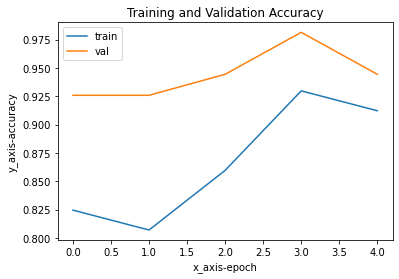

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('y_axis-accuracy')
plt.xlabel('x_axis-epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

2/2 [==============================] - 49s 23s/step
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 3 2 2 3 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 2 4 4 4 4]
Predictions: 	 Filename:
001 		 001/index_2.bmp


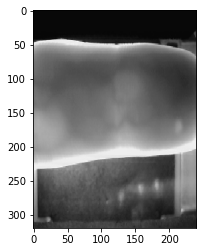

Predictions: 	 Filename:
001 		 001/index_4.bmp


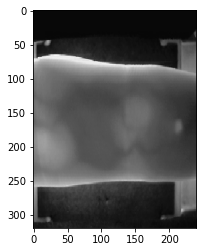

Predictions: 	 Filename:
001 		 001/index_5.bmp
Predictions: 	 Filename:
002 		 002/index_4.bmp


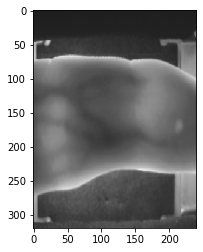

Predictions: 	 Filename:
002 		 002/index_5.bmp


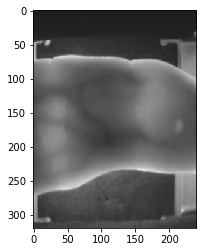

Predictions: 	 Filename:
002 		 002/middle_4.bmp


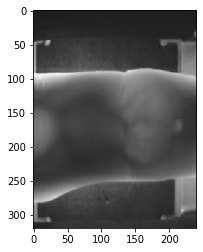

Predictions: 	 Filename:
002 		 002/middle_5.bmp


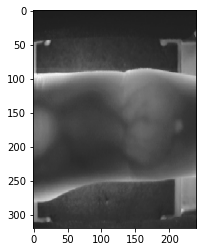

Predictions: 	 Filename:
002 		 002/ring_4.bmp


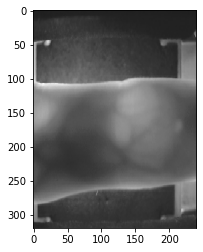

Predictions: 	 Filename:
002 		 002/ring_5.bmp


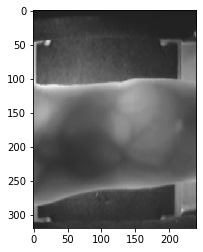

Predictions: 	 Filename:
002 		 002/ring_6.bmp


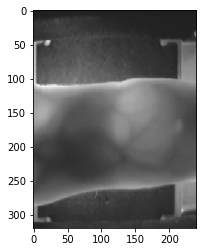

Predictions: 	 Filename:
003 		 003/index_2.bmp


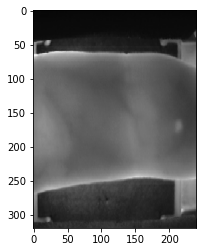

Predictions: 	 Filename:
003 		 003/index_3.bmp


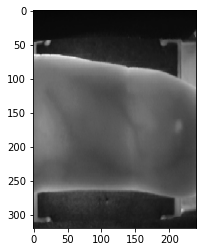

Predictions: 	 Filename:
003 		 003/index_4.bmp


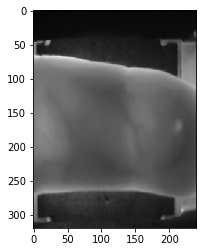

Predictions: 	 Filename:
003 		 003/index_5.bmp


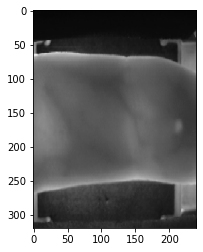

Predictions: 	 Filename:
003 		 003/middle_4.bmp


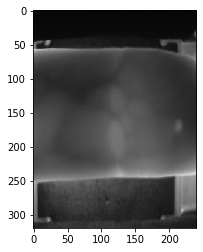

Predictions: 	 Filename:
003 		 003/middle_5.bmp


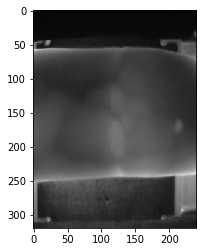

Predictions: 	 Filename:
004 		 003/ring_4.bmp


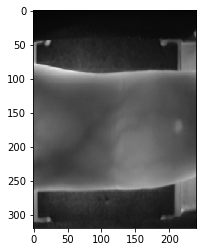

Predictions: 	 Filename:
003 		 003/ring_5.bmp


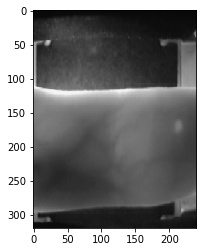

Predictions: 	 Filename:
003 		 003/ring_6.bmp


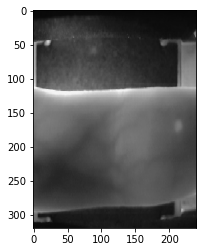

Predictions: 	 Filename:
004 		 004/index_2.bmp


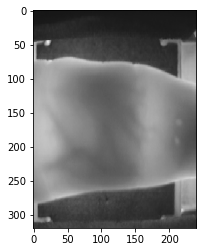

Predictions: 	 Filename:
004 		 004/index_4.bmp


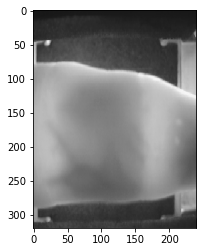

Predictions: 	 Filename:
004 		 004/index_5.bmp


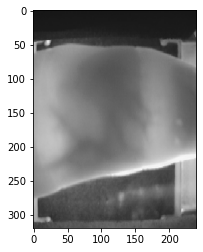

Predictions: 	 Filename:
004 		 004/index_6.bmp


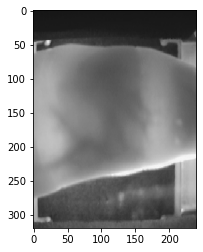

Predictions: 	 Filename:
004 		 004/middle_4.bmp


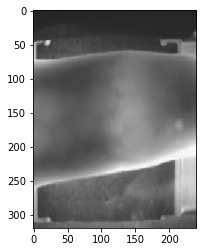

Predictions: 	 Filename:
004 		 004/middle_5.bmp


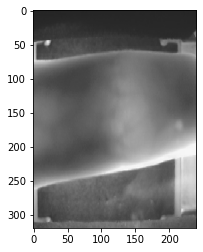

Predictions: 	 Filename:
004 		 004/ring_1.bmp
Predictions: 	 Filename:
004 		 004/ring_4.bmp
Predictions: 	 Filename:
004 		 004/ring_5.bmp
Predictions: 	 Filename:
004 		 004/ring_6.bmp
Predictions: 	 Filename:
005 		 005/index_4.bmp
Predictions: 	 Filename:
005 		 005/index_5.bmp
Predictions: 	 Filename:
005 		 005/middle_1.bmp
Predictions: 	 Filename:
005 		 005/middle_3.bmp
Predictions: 	 Filename:
005 		 005/middle_4.bmp
Predictions: 	 Filename:
005 		 005/middle_5.bmp
Predictions: 	 Filename:
005 		 005/ring_4.bmp
Predictions: 	 Filename:
005 		 005/ring_5.bmp
Predictions: 	 Filename:
005 		 005/ring_6.bmp
Predictions: 	 Filename:
003 		 006/index_1.bmp
Predictions: 	 Filename:
005 		 006/middle_1.bmp
Predictions: 	 Filename:
005 		 006/middle_3.bmp
Predictions: 	 Filename:
005 		 006/ring_2.bmp
Predictions: 	 Filename:
005 		 006/ring_3.bmp


In [ ]:
#print("Evaluate on test data")
#results = model.evaluate(val_set)
#print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
#print("Generate predictions for 3 samples")
#predictions = model.predict(val_set)
#print(predictions.shape)

#y_prob = model.predict_generator(val_set,steps=len(val_set),verbose=1)
pred = model.predict(val_set,verbose=1,steps=len(val_set))
predicted_class_indices=np.argmax(pred,axis=1)
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=val_set.filenames

results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
print(predicted_class_indices)
#print(labels)
#print(predictions)


#print(val_set)
#print(y_prob)
x,y = val_set.next()

#c1=np.round(y_prob)
#filenames=val_set.filenames
#results=pd.DataFrame({"file":filenames,"pr":y_prob[:,0],"class":c1[:,0]})
#display(results)

for i in range(len(results)):
    print("Predictions:","\t","Filename:")
    print(results['Predictions'][i],"\t\t",results['Filename'][i])
    if i<32:
        image = x[i]
    
        plt.imshow(image)
        plt.show()
    
#print(results)

#y_classes = y_prob.argmax(axis=1)
#print(y_classes)
#print("predictions shape:", predictions.shape)

Train Accuracy = 94.0%


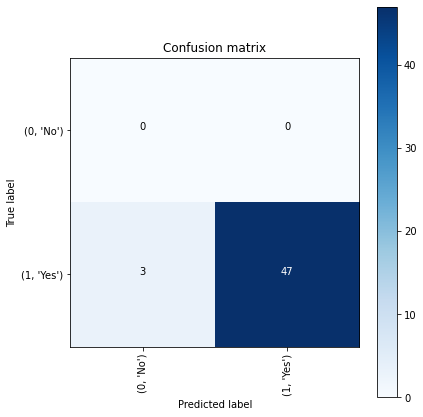

None


In [ ]:
val_set.reset()
predictions = model.predict(val_set)
prediction_list = []
for i in predictions:
    prediction_list.append(1 if any(x>0.5 for x in i) else 0)
#print("Prediction List:",prediction_list)
u_val=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#print("True List:",u_val)
tr_accuracy = accuracy_score(u_val, prediction_list)
print(f'Train Accuracy = { tr_accuracy*100}%')
label = dict()
label[0]="No"
label[1]="Yes"
confusion_mtx = confusion_matrix(u_val, prediction_list) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(label.items()), normalize=False)

Test Accuracy = 98.14814814814815%


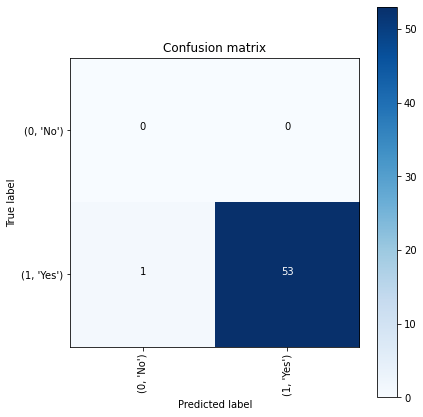

None


In [ ]:
test_set.reset()
predictions = model.predict(test_set)
prediction_list = []
for i in predictions:
    prediction_list.append(1 if any(x>0.5 for x in i) else 0)
#print("Prediction List:",prediction_list)
u_val=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#print("True List:",u_val)
ts_accuracy = accuracy_score(u_val, prediction_list)
print(f'Test Accuracy = { ts_accuracy*100}%')
label = dict()
label[0]="No"
label[1]="Yes"
confusion_mtx = confusion_matrix(u_val, prediction_list) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(label.items()), normalize=False)

In [ ]:
import os.path
if os.path.isfile('/content/drive/MyDrive/Dataset1/vgg.h5')is False:
  model.save('/content/drive/MyDrive/Dataset1/vgg.h5')

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Dataset1/vgg.h5")